#**Lab 11 - Data science and principal component analysis**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [1]:
# Do not edit this cell.

LabID="Lab11"

try:
  from graderHelp import ISGRADEPLOT
except ImportError:
  ISGRADEPLOT = True

**Enter your name, section number, and BYU NetID**

In [2]:
# Enter your first and last names in between the quotation marks.

first_name="Brigham"

last_name="Andersen"

# Enter your Math 215 section number in between the quotation marks. 

section_number="001"  

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER! 

BYUNetID="abrigham"  

**Import the required packages**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Problem 1**

In [4]:
# This function returns the coordinate of x projected to the line spanned by u.

def projection_coordinate(u,x):
  return np.matmul(u,x)

**Problem 2**

In [5]:
# This function returns the coordinates of the points in X projected to the plane spanned by u1 and u2.

def projection_2D(u1,u2,X):
  U = np.array([u1,u2])
  return projection_coordinate(U, X)

**Downloading dataset**

The simplest way to load the data file into Colab is to first download it as  .csv file to your local computer by clicking the link

https://drive.google.com/uc?export=download&id=1zwNTk7r46RWzuZJO7THf_n5FyCkew7Ns

This will allow you to download the data as a .csv file.  In the top left corner of this screen you should see a little file folder icon. Selecting it opens a new window to the left of the notebook with three tabs: "Upload", "Refresh", and "Mount Drive". Select "Upload".  This should bring up a window that allows you to select the file "Lab11data.csv" from your local machine, which will upload the file to your notebook.  You will need to do this again if you decide to close your notebook and reopen it at a later time.

**Converting the dataset into arrays**

The following cell imports the data and creates three NumPy arrays.  The array X_total contains a column for each surveyed individual, with one row for each of their (numerical) survey answers.  The array X_neg contains the survey information of only the individuals who tested negative for cancer, while the array X_pos contains the survey information of only the individuals who tested positive for cancer.  This cell also creates two vectors which represent survey data for two unknown patients, Alice and Bob.

In [6]:
df = pd.read_csv('Lab11data.csv',header=None)
X_neg=df.loc[df[100]==0].drop(columns=100).values.transpose()
X_pos=df.loc[df[100]==1].drop(columns=100).values.transpose()
X_total=df.loc[df[100]>=0].drop(columns=100).values.transpose()
Alice=df.loc[df[100]<0].drop(columns=100).values[0,:]
Bob=df.loc[df[100]<0].drop(columns=100).values[1,:]

 **Problem 3**

In [7]:
# Save the value of the covariance matrix you obtain in Problem 3 as the variable W.

W=(1/(len(X_total[0])-1))*np.matmul(X_total,np.transpose(X_total))

**Problem 4**

In [8]:
# Save the eigenvalues and eigenvectors you produced for Problem 4 here.
L, P = np.linalg.eig(W)

L1=L[0]
L2=L[1]
L3=L[2]

u1=P[:,0]
u2=P[:,1]
u3=P[:,2]

**Problem 5**

In [9]:
# Save the variance values you produced for Problem 5 here.

total_variance=np.sum(L)

reduced_variance=L1+L2

relative_variance=reduced_variance/total_variance

**Problem 6**

In [10]:
# Save the projected data points from Problem 6 here.

X_neg_2D=projection_2D(u1,u2,X_neg)

X_pos_2D=projection_2D(u1,u2,X_pos)

Alice_2D=projection_2D(u1,u2,Alice)

Bob_2D=projection_2D(u1,u2,Bob)

**Problem 7**

This function can be used to plot the various 2-dimensional data points we've found.  It can accept up to four different arrays (any combination of X_neg_2D, X_pos_2D, Alice_2D, Bob_2D), and will plot the data together on a single plot.

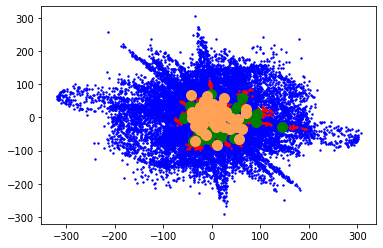

In [11]:
# Use this function to plot the various 2-dimensional data points we've found.  You can plot all of the data at once, or one array at a time.

def plot_data(Z1=[],Z2=[],Z3=[],Z4=[]):
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  colors = plt.cm.rainbow(np.linspace(0, 1, 10))
  if len(Z1)>0:
    Y1=np.reshape(Z1,(2,-1))
    ax1.scatter(Y1[0,:], Y1[1,:], s=2, c='b', marker="o")
  if len(Z2)>0:
    Y2=np.reshape(Z2,(2,-1))
    ax1.scatter(Y2[0,:], Y2[1,:], s=2, c='r', marker="o")
  if len(Z3)>0:
    Y3=np.reshape(Z3,(2,-1))
    ax1.scatter(Y3[0,:], Y3[1,:], s=100, c='g', marker="o")
  if len(Z4)>0:
    Y4=np.reshape(Z4,(2,-1))
    ax1.scatter(Y4[0,:], Y4[1,:], s=100, c=[colors[7]], marker="o")
  plt.show()  
  return None

plot_data(X_neg, X_pos, Alice, Bob)

In [12]:
# Save the values of your predictions below.  +1 indicates the individual is predicted to develop this type of cancer (testing positive), while -1 indicates they are predicted not to (testing negative).

Alice_prediction=1

Bob_prediction=-1

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.  

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up.  Your code will not be able to be graded if there are any error messages.**

To submit your lab for grading you must first download it to your compute as .py file.  In the "File" menu select "Download .py".  The resulting file can then be uploaded to http://www.math.byu.edu:30000 for grading.